In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Table of Contents
<ul>
<li><a href="#intro">Dataset</a></li>
<li><a href="#asses">Assessing</li>
<li><a href="#univariate">Univariate plot</a></li>
<li><a href="#bivariate">Bivariate</a></li>
<li><a href="#wrang">Wrangling</a></li>
<li><a href="#multi">Multivariate</a></li>
</ul>



<a id="top"></a>

# Ford GoBike ride Data Exploration
by Neetu Sinha

<a id="intro"></a>

# DataSet

That dataset consists of reagarding 183412 bike trip with different stations, In that data set we have 16 columns.
bike rider rent different types of bike with their interest, and they start their trip with certain date/time and station/longitute/letitude. After certain minutes/ hour riding rented bike and then they stopped in certain bike station.
Sometimes bikehshare.com in bayarea also provide a certain discount, for those who are underprivileged. In the dataset we have a coloumn  	bike_share_for_all_trip, that column is related about that kind of discount No means didn't get discount and yes they got discount in user type.

For more information about it, you can read it in here https://www.bikeshareforall.org/ride

bike ride share data is provided by Udacity, but you can also get that from that website.
https://www.bikeshare.com/data/

 That website is provided data  for analysis of different stats, you can choose your favorite state for bike ride share analysis.


# Preliminary Wrangling

Ford go bike data set very dirty and untidy, need to make it clean and tidy.
We have some missing values, member_birth_year column is not consistent, all dataype are not according to attributes, need to change them, dropped nan values and unneccessary columns, extracted values from the columns.Made data nice and clean.

In [2]:
#importing packages throughout use for that analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the file and print few lines
# fordgobike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/udacity_projects/201902-fordgobike-tripdata.csv')
# fordgobike.head()
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#check the shape, columns and description of bike dataset.
print(fordgobike.shape)
print(fordgobike.columns)
print(fordgobike.describe())

(183412, 16)
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')
        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_

What is the structure of your dataset?

(183412, 16)

What is/are the main feature(s) of interest in your dataset?

most interesting feature is duration of seconds, how long users ride their bikes, and user type, user type can tell you how often people rent bikes or they have a monthly subscription or weekly. Time, day, subscription are these variables are important for analysis, we can see how many users have annual subscription, and customers who rent bikes for a day or week. What age limit of users rent a bike most and least.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Other interesting features are  start_time, end_time, stations, longitute, latitue, member_gender.
Do users like certain station to start and end their trip?

Which longitude and latitude they prefer to ride bike?

Which time and date are they available for bike trip? Do they use bike as a transportation or for fun?

What is the age limit of bikers?

Is more male rent bikes than female?
All answers will be below after visualization.


<a id="asses"></a>
Assessing

## Assessing

In [5]:
#information of the dataset.
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#check the duplicates
fordgobike.duplicated().sum()

0

In [7]:
#check the Nan values, we have nan values in start_station_id, start_staion_name, end_station_id, end_station_name, member_birth_year and member_gender.
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#getting more info about the dataset through sample, check the trend of values
fordgobike.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
98630,349,2019-02-15 07:24:26.4020,2019-02-15 07:30:15.8060,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2016,Subscriber,1963.0,Female,No
83983,1354,2019-02-17 19:10:37.1360,2019-02-17 19:33:11.9640,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,5908,Subscriber,1976.0,Male,Yes
88716,414,2019-02-16 17:33:15.4570,2019-02-16 17:40:09.8190,73.0,Pierce St at Haight St,37.771793,-122.433708,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4928,Subscriber,1988.0,Male,No
5871,589,2019-02-28 11:52:36.9270,2019-02-28 12:02:26.4630,16.0,Steuart St at Market St,37.794130,-122.394430,61.0,Howard St at 8th St,37.776513,-122.411306,6312,Subscriber,NaN,NaN,No
163438,468,2019-02-05 09:17:54.7540,2019-02-05 09:25:43.0600,85.0,Church St at Duboce Ave,37.770083,-122.429156,223.0,16th St Mission BART Station 2,37.764765,-122.420091,987,Subscriber,1957.0,Male,No
11093,1445,2019-02-27 18:49:41.0650,2019-02-27 19:13:46.3800,49.0,S Park St at 3rd St,37.780760,-122.394989,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,4806,Subscriber,1994.0,Female,No
149508,235,2019-02-06 19:16:37.5950,2019-02-06 19:20:32.8800,134.0,Valencia St at 24th St,37.752428,-122.420628,131.0,22nd St at Dolores St,37.755000,-122.425728,4722,Subscriber,1987.0,Female,No
178018,541,2019-02-01 18:05:03.1090,2019-02-01 18:14:04.4600,187.0,Jack London Square,37.796248,-122.279352,182.0,19th Street BART Station,37.809013,-122.268247,4682,Subscriber,1993.0,Male,No
3967,464,2019-02-28 16:40:52.0210,2019-02-28 16:48:36.1310,77.0,11th St at Natoma St,37.773507,-122.416040,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1122,Customer,NaN,NaN,No
37589,4863,2019-02-23 12:35:22.9790,2019-02-23 13:56:26.0410,72.0,Page St at Scott St,37.772406,-122.435650,109.0,17th St at Valencia St,37.763316,-122.421904,6497,Customer,1990.0,Female,No


Lots of data is missing from member_birth_year and member_gender, we also have missing data from stations.

In [9]:
#check all values in duration_sec column
fordgobike.duration_sec.value_counts()

272      311
324      292
323      291
306      291
305      290
369      287
387      286
274      284
354      283
380      282
297      281
325      281
344      281
341      280
269      280
343      280
270      279
337      278
339      277
287      277
329      277
316      276
280      276
298      276
315      275
336      275
366      275
384      274
264      274
317      274
        ... 
2856       1
11949      1
80891      1
3881       1
3037       1
4139       1
2909       1
39759      1
10412      1
6879       1
2472       1
4702       1
6570       1
66185      1
29010      1
12204      1
5035       1
8280       1
5291       1
38991      1
6105       1
17953      1
3802       1
3752       1
22225      1
5803       1
11870      1
5931       1
15964      1
5058       1
Name: duration_sec, Length: 4752, dtype: int64

In [10]:
#description of duration column
fordgobike.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [11]:
#converting duration_sec in minutes, and description
def convert_min(x, inverse = False):
  if not inverse:
    return x/60
  else:
    return x%60
fordgobike['duration_min'] = fordgobike['duration_sec'].apply(convert_min)
fordgobike.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

<a id="univariate"></a>
Univaraite

## Univariate Plot

Exploring dataset with single variables.

In [12]:
#selecting all objects column from the dataset
obj_cols = fordgobike.select_dtypes(include= ['object']).columns
obj_cols

Index(['start_time', 'end_time', 'start_station_name', 'end_station_name',
       'user_type', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

**Which vaurables are positivly and negativly correlated to rent a bike?**

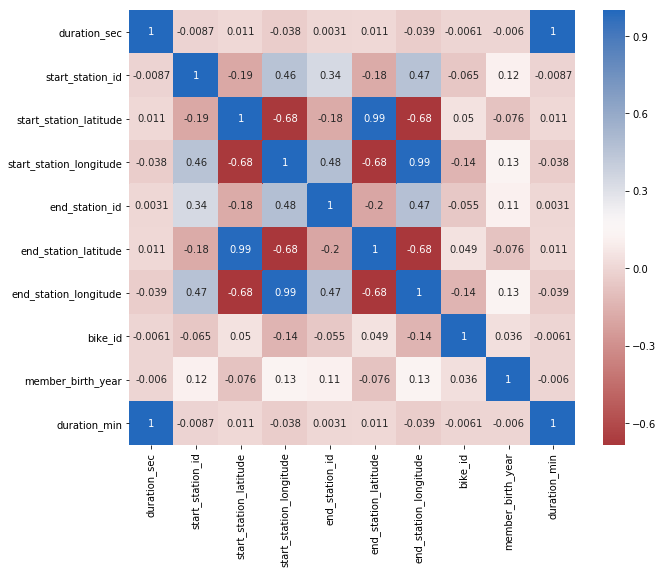

In [13]:
#selecting all numeric columns from the dataset and correlation plot
plt.figure(figsize=[10,8])
num_cols = fordgobike.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(fordgobike[num_cols].corr(), annot=True, cmap='vlag_r')

plt.show()

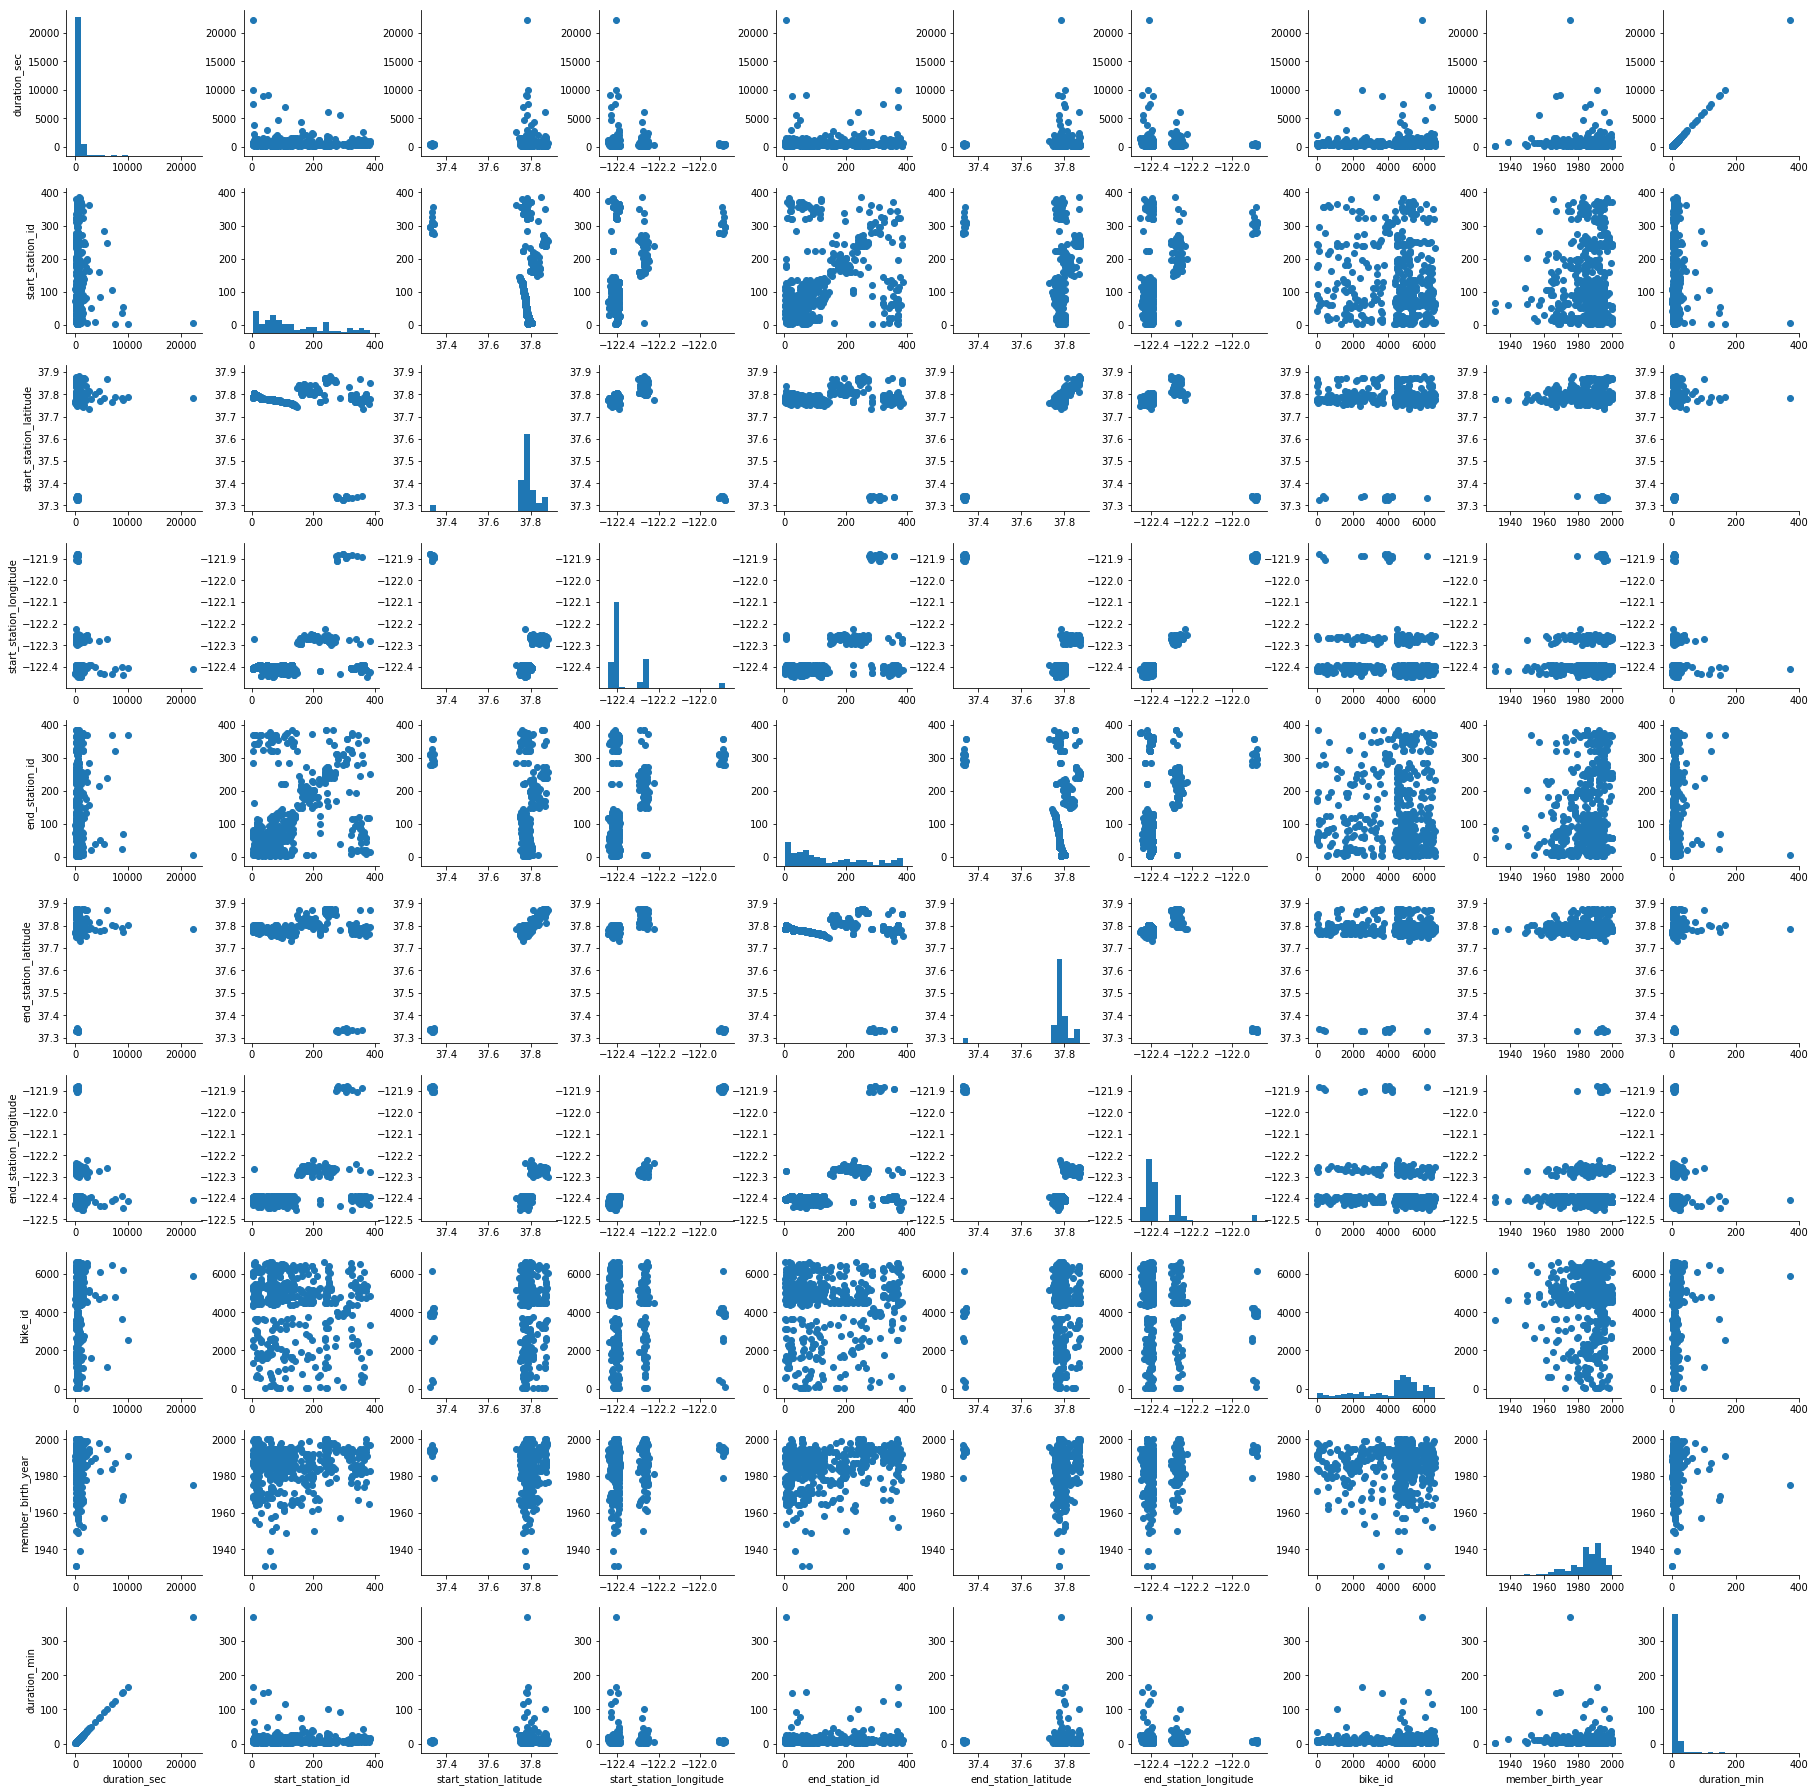

In [14]:
#plot matrix
sample = np.random.choice(fordgobike.shape[0], 500, replace=False)
fordgobike_samp = fordgobike.loc[sample,:]
fordgobike_samp.dropna(inplace = True)
g = sns.PairGrid(data=fordgobike_samp, vars=num_cols)
g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
plt.show()

Data has a lots of outliers, as from the heatmap plot and matrix plot,
Start_station_latitude, and end_station_latitude are positivly correlated, start_station_id and end_station_latitue are positive moderate correlated, start_station_longitude and start_station_latitude are negative correlated, same as negative correlation between longitude/latitude in end station, duration_sec is negatively correlated with start_station_id, bike_id, and birth_year, but slightly positive correlation between start_station_id, end_station_id, and end_station_latitude, other variables are not so important for the analysis. Duration time should be correlated with other variables but we can see there is slightly positive and negative correlation with other variables, we need further investiagation about that variable.

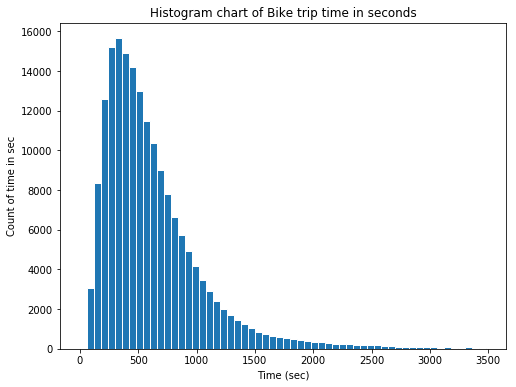

In [15]:
#bike trip Time plot in seconds
plt.figure(figsize=[8,6])
bins = np.arange(0,fordgobike['duration_sec'].quantile(0.99) + 60,  60)
plt.hist('duration_sec', data = fordgobike, bins = bins, edgecolor = 'white')
plt.xlabel('Time (sec)')
plt.ylabel('Count of time in sec')
plt.title('Histogram chart of Bike trip time in seconds')
plt.show()

The hist plot is right skewed in time duration in seconds of bike trip, maximum bike trip time is between 300-400 seconds, higher time is very less in the plot, need to be more investigation.

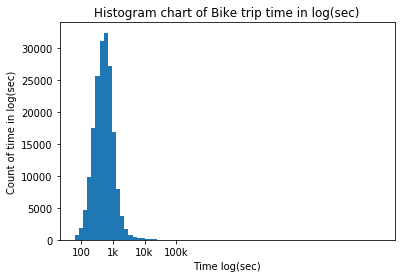

In [16]:
#hist plot using log of duration sec, transforming time to log
log_binsize = 0.13
bins = 10**np.arange(1.8, np.log(fordgobike['duration_sec'].max()) +log_binsize, log_binsize)
plt.hist('duration_sec', data = fordgobike, bins = bins)
plt.xscale('log')
plt.xticks([100, 1e3, 1e4, 1e5], ['100', '1k', '10k', '100k'])
plt.xlabel('Time log(sec)')
plt.ylabel('Count of time in log(sec)')
plt.title('Histogram chart of Bike trip time in log(sec)')
plt.show()

Using log scale in duration_sec variable, we got interesting plot, there is a peak in 1k seconds.

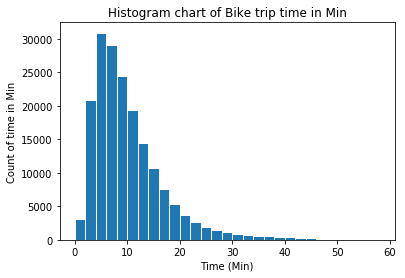

In [17]:
#bike trip Time plot in minutes
bins = np.arange(0, fordgobike['duration_min'].quantile(0.99) + 2, 2)
plt.hist('duration_min', data = fordgobike, bins = bins, edgecolor = 'white')
plt.xlabel('Time (Min)')
plt.ylabel('Count of time in Min')
plt.title('Histogram chart of Bike trip time in Min')
plt.show()


Hist plot in converting time to minutes plot is right skew. In this plot we measure bins in quantile distribution, Plot is not linear.

In [18]:
#check values in user type
fordgobike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

How many users are subscriber or customers for bike trip plan?

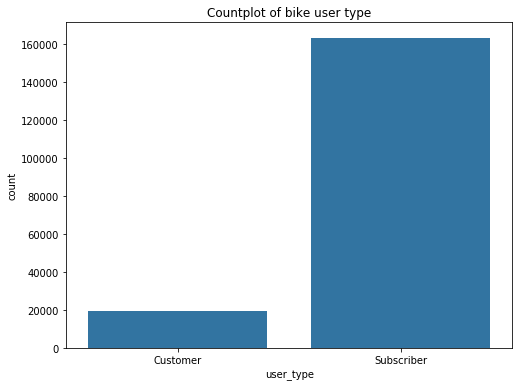

In [19]:
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
sns.countplot('user_type', data = fordgobike, color = base_color)
plt.title('Countplot of bike user type')
plt.show()

The count plot of user type, we can see there are more subscribers than customers, bike users have annual subscriptions of their bikes, we can say people in bigger cities they use ford bikes a lot not only for fun they use as a transportation too.

In [20]:
fordgobike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

**What percent of male and female rent a bike?**

In [21]:
prop_male = fordgobike.query('member_gender=="Male"').shape[0]/fordgobike.shape[0]
prop_female = fordgobike.query('member_gender=="Female"').shape[0]/fordgobike.shape[0]
prop_male, prop_female

(0.7123361612108259, 0.222689900333675)

Text(0,0.5,'Proportion of gender')

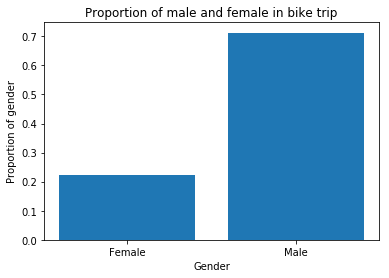

In [22]:
plt.bar(["Male", "Female"], [prop_male, prop_female])
plt.title('Proportion of male and female in bike trip')
plt.xlabel('Gender')
plt.ylabel('Proportion of gender')

71% male and 20% of female are participated in the bike trip.

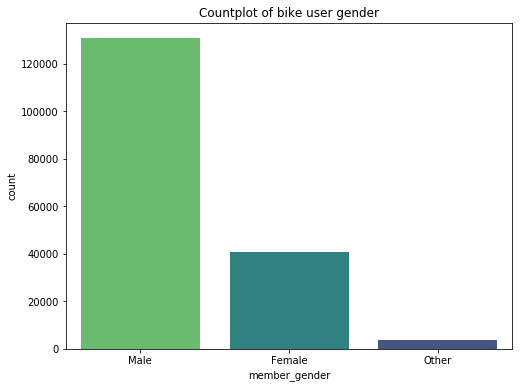

In [23]:
plt.figure(figsize=(8,6))
order = ['Male', 'Female', 'Other']
sns.countplot('member_gender', data = fordgobike, color = base_color, order=order, palette='viridis_r')
plt.title('Countplot of bike user gender')
plt.show()

There are more male than female users are in the bike trip plan. There are few belong to others, I assume that these others are not registered as a male or female, I searched about the gender type other than male and female and, I found that there are 7 unique genders(female, male, intersex, trans, non-conforming, personal, and eunuch)

<a id="bivariate"></a>
Bivariate

## Bivariate

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I assumed that females are more involved in the bike trip than male, but It was opposite of my thought I found more males are enjoyed biking than females, and they are more subscriber than other genders too. Another Interesting thing that bikers who are underprivileged they get discount on anual subscription and they get equally discount based on the percentage of subscriber or customers.

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Other interesting feature is start_station_id and end_station_id, when we plot histogram, found that these two variables are identical.
Member who's birth year 1990, they are highly involved in bike trip than other ages even bikers who are in 20's or some they are not actively used bike trip.
Another intersting thing is that relationship between start_longitude, start_latitude, end_longitude and end_latitude are identical, I think bikers use same latitude and longitude for their bike trip. 
On Thursdays, bikers use quite a bit bike trip than other weekdays. On weekends, they do not use bike trip as much as they do on weekdays.

How many male and female rent a bike, are they customers or subscriber what is the majority of them?

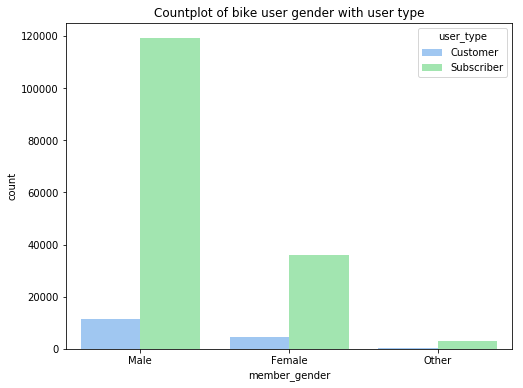

In [24]:
plt.figure(figsize=(8,6))
order = ['Male', 'Female', 'Other']
sns.countplot('member_gender', data = fordgobike, color = base_color, hue='user_type', order=order, palette='pastel')
plt.title('Countplot of bike user gender with user type')
plt.show()

Number of males are higher majority than female for bike trip and males are more subscriber than other gender.

How many users who are customers or subscriber got the special discount for renting a bike?

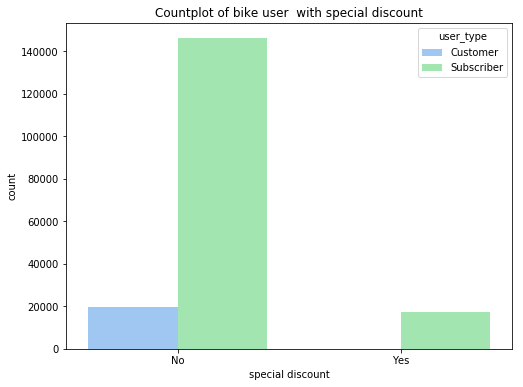

In [25]:
plt.figure(figsize=(8,6))
sns.countplot('bike_share_for_all_trip', data = fordgobike, color = base_color, hue='user_type', palette='pastel')
plt.title('Countplot of bike user  with special discount')
plt.xlabel('special discount')
plt.show()

Very few subsciber got special plan for annual membership, but customers didn't get special offer, those who fullfill requirement of annual membership of bike trip, got special discount.

Do female get more discount than male to rent a bike?

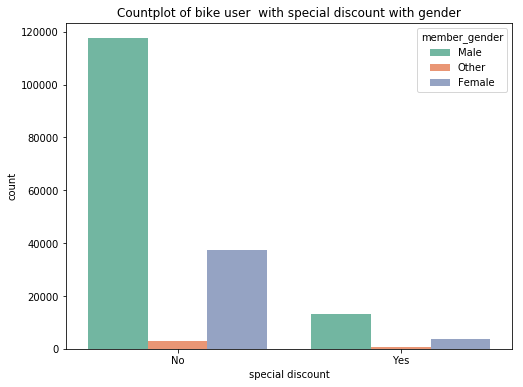

In [26]:
plt.figure(figsize=(8,6))
sns.countplot('bike_share_for_all_trip', data = fordgobike, color = base_color, hue='member_gender', palette='Set2')
plt.title('Countplot of bike user  with special discount with gender')
plt.xlabel('special discount')
plt.show()

We can see males are in higher majority who didn't get special discount very few male got the discount, howevere males are in higher majority who rent a bike than female, therefore, we can see all genders got equally discount dependes on what fraction of gender involve to rent a bike.

<a id="wrang"></a>
Wrangling

## Wrangling

In [27]:
#making copy of original dataset
fordgobike_copy = fordgobike.copy()

In [28]:
#dropping na values from the member_birth_year
fordgobike_copy = fordgobike_copy.dropna(subset=['member_birth_year'])

In [29]:
#converting float to int birth_year, it is already in float but was getting error so I converted first float and then int.
fordgobike_copy['member_birth_year'] = fordgobike_copy['member_birth_year'].astype(float).astype(int)


In [30]:
#converting start_time and end_time columns to date time column
def convert_time(x):
  var_time = pd.to_datetime(x)
  return var_time
fordgobike_copy['start_time'] = fordgobike_copy['start_time'].apply(convert_time)
fordgobike_copy['end_time'] = fordgobike_copy['end_time'].apply(convert_time)

In [31]:
#check time column converted to date time.
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null int64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
duration_min               175147 non-null float64
dtypes: datetime64[

In [32]:
#check start and end staion ids
fordgobike_copy.start_station_id.value_counts(), fordgobike_copy.end_station_id.value_counts()

(58.0     3649
 67.0     3408
 81.0     2952
 21.0     2711
 3.0      2620
 30.0     2577
 15.0     2541
 22.0     2216
 16.0     2191
 5.0      2144
 6.0      1975
 239.0    1761
 243.0    1712
 50.0     1702
 27.0     1678
 66.0     1675
 17.0     1646
 93.0     1496
 90.0     1479
 44.0     1476
 23.0     1420
 245.0    1322
 19.0     1311
 104.0    1274
 61.0     1257
 182.0    1231
 126.0    1226
 114.0    1224
 256.0    1176
 350.0    1154
          ... 
 217.0      54
 209.0      54
 361.0      53
 46.0       53
 297.0      49
 358.0      48
 283.0      47
 318.0      37
 362.0      36
 228.0      35
 287.0      32
 288.0      32
 290.0      31
 298.0      30
 378.0      28
 307.0      27
 359.0      25
 229.0      23
 303.0      19
 226.0      19
 225.0      17
 388.0      17
 398.0      16
 389.0      13
 301.0       9
 234.0       9
 51.0        7
 224.0       4
 300.0       3
 344.0       2
 Name: start_station_id, Length: 329, dtype: int64, 67.0     4624
 58.0     3709
 21.

Number of station id's in the bike trip?

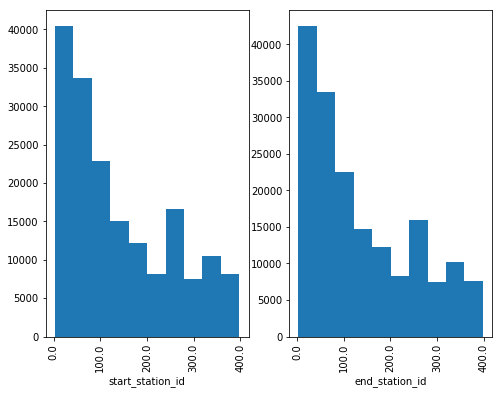

In [33]:
fordgobike_copy = fordgobike_copy[np.isfinite(fordgobike_copy['start_station_id'])]
fordgobike_copy = fordgobike_copy[np.isfinite(fordgobike_copy['end_station_id'])]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8,6])
bin_x = np.arange(min(fordgobike_copy.start_station_id), max(fordgobike_copy.start_station_id), 2)
bin_y = np.arange(min(fordgobike_copy.end_station_id), max(fordgobike_copy.end_station_id))

ax[0].hist(x = 'start_station_id', data = fordgobike_copy)
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 90)  
ax[0].set_xlabel('start_station_id')

ax[1].hist(x = 'end_station_id', data = fordgobike_copy)
ax[1].set_xlabel('end_station_id')
ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 90)  
plt.show()

We can see start station id and end station id plot is identical, users rented bike in the same station id and returen it back or stopped in the same bike station.

Which bike station is most active or busy?

In [34]:
#check station name
fordgobike_copy.start_station_name.value_counts()

Market St at 10th St                                               3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3408
Berry St at 4th St                                                 2952
Montgomery St BART Station (Market St at 2nd St)                   2711
Powell St BART Station (Market St at 4th St)                       2620
San Francisco Caltrain (Townsend St at 4th St)                     2577
San Francisco Ferry Building (Harry Bridges Plaza)                 2541
Howard St at Beale St                                              2216
Steuart St at Market St                                            2191
Powell St BART Station (Market St at 5th St)                       2144
The Embarcadero at Sansome St                                      1975
Bancroft Way at Telegraph Ave                                      1761
Bancroft Way at College Ave                                        1712
2nd St at Townsend St                                           

In [35]:
#grouping with staion name with duration sec
group_sname = fordgobike_copy.groupby(['start_station_name', 'end_station_name'])['duration_sec'].mean()

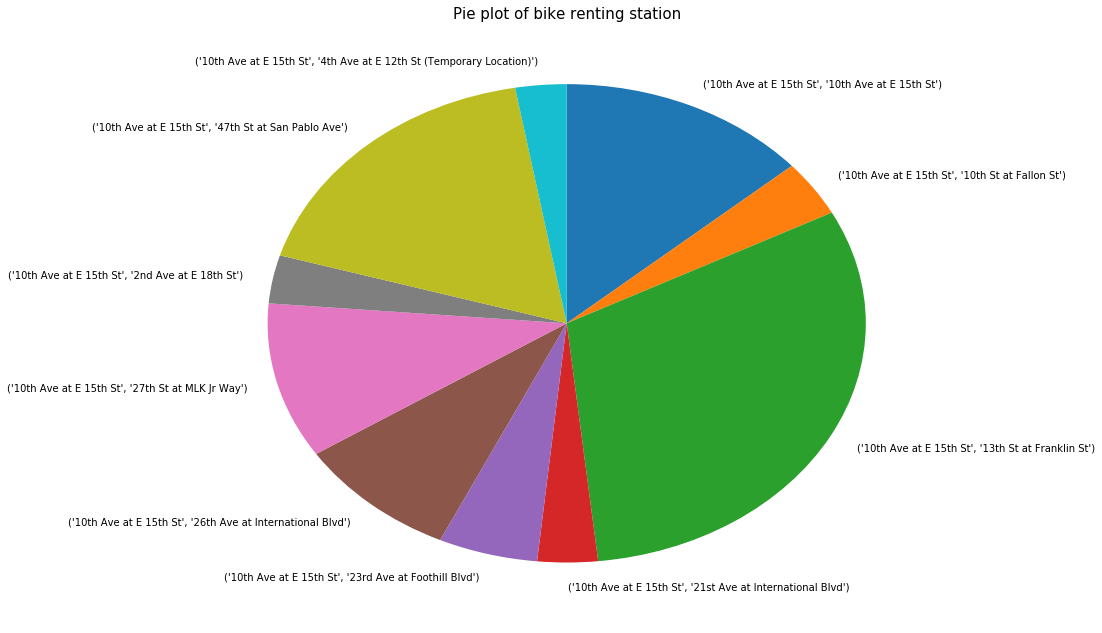

In [36]:
#slicing of first 10 values and make a pie plot
group_sname = group_sname.iloc[:10]
plt.figure(figsize=[13.4,11])
plt.pie(group_sname, labels = group_sname.index, startangle=90, counterclock=False)
plt.title('Pie plot of bike renting station', fontsize = 15)
plt.show()

Bart station on 2nd St. is highly busy and popular than other station, I guess bikers like that bike station alot.

In [37]:
#check member birt year values entries.
fordgobike_copy.query('member_birth_year <= 1878 or member_birth_year <= 1945')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
1073,303,2019-02-28 19:49:38.120,2019-02-28 19:54:42.044,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6333,Subscriber,1945,Male,Yes,5.050000
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,2.466667
2085,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,107.0,17th St at Dolores St,37.763015,-122.426497,89.0,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941,Male,No,11.566667
2366,191,2019-02-28 18:14:07.503,2019-02-28 18:17:18.808,76.0,McCoppin St at Valencia St,37.771662,-122.422423,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6558,Subscriber,1945,Male,Yes,3.183333
2484,3458,2019-02-28 17:13:50.585,2019-02-28 18:11:28.806,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6558,Subscriber,1945,Male,Yes,57.633333
4818,545,2019-02-28 14:50:15.746,2019-02-28 14:59:21.237,121.0,Mission Playground,37.759210,-122.421339,109.0,17th St at Valencia St,37.763316,-122.421904,6224,Subscriber,1945,Male,Yes,9.083333
5197,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931,Male,No,3.616667
5249,1396,2019-02-28 13:21:36.678,2019-02-28 13:44:53.057,22.0,Howard St at Beale St,37.789756,-122.394643,74.0,Laguna St at Hayes St,37.776435,-122.426244,623,Subscriber,1943,Female,No,23.266667
5266,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931,Male,No,6.400000
5447,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931,Male,No,2.450000


In [38]:
#get the birth year until users who are in 70's
fordgobike_copy = fordgobike_copy.loc[fordgobike_copy['member_birth_year'] >= 1945]

In [39]:
#calculate the members age
age = []
current_year = 2021
for i in fordgobike_copy.member_birth_year:
  cal_age = current_year - i
  age.append(cal_age)
fordgobike_copy['member_age'] = age
fordgobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,62


In [40]:
#drop member_birth_year
fordgobike_copy.drop('member_birth_year', axis= 1, inplace= True)
fordgobike_copy.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869.75,37


What age of users rent a bike?

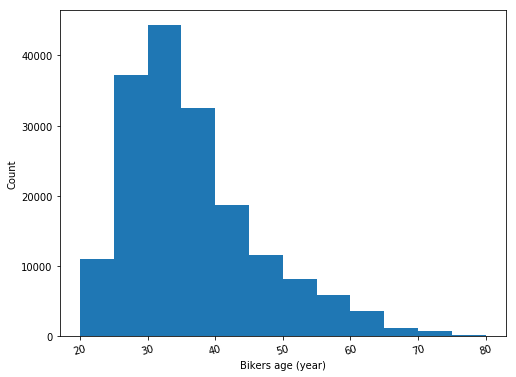

In [41]:
plt.figure(figsize = [8,6])
bins = np.arange(min(fordgobike_copy.member_age), max(fordgobike_copy.member_age)+5, 5)
plt.hist(data = fordgobike_copy, x = 'member_age', bins = bins)
plt.xticks(rotation=15)
plt.xlabel('Bikers age (year)')
plt.ylabel('Count')
plt.show()

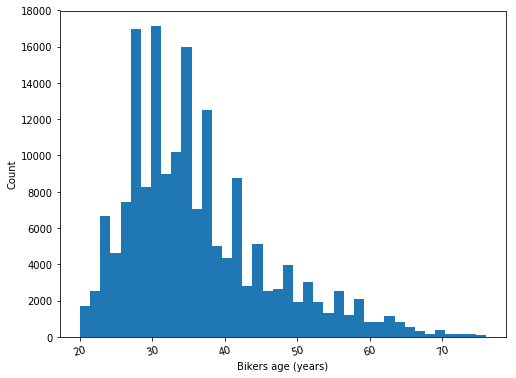

In [42]:
#changing bins in the birth year plot
plt.figure(figsize = [8,6])
plt.hist(data = fordgobike_copy, x = 'member_age', bins = 40)
plt.xticks(rotation=15)
plt.xlabel('Bikers age (years)')
plt.ylabel('Count')
plt.show()

Users birth year plot is right skew, adults do not use bike as much as youngers use bike trip.Mostly users are in 30's.It's right skewed.

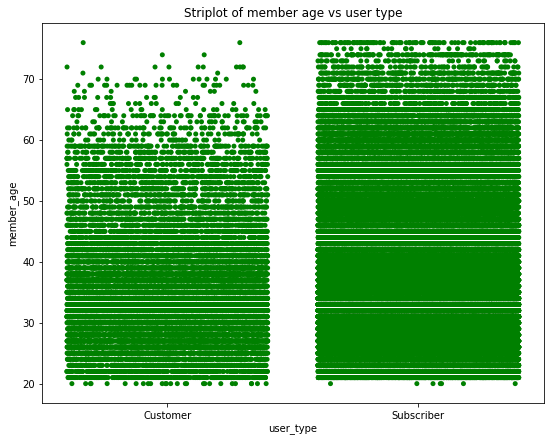

In [43]:
plt.figure(figsize=[9,7])
sns.stripplot(data = fordgobike_copy, x = 'user_type', y = 'member_age', jitter = 0.4, color= 'Green')
plt.title('Striplot of member age vs user type')
plt.show()

Member age upto 70 are more subscriber than customer. Age is just a number, you can enjoy riding a bike in any age as far as you are comfortable with it.

Text(0.5,1,'Violinplot of age vs user type with gender')

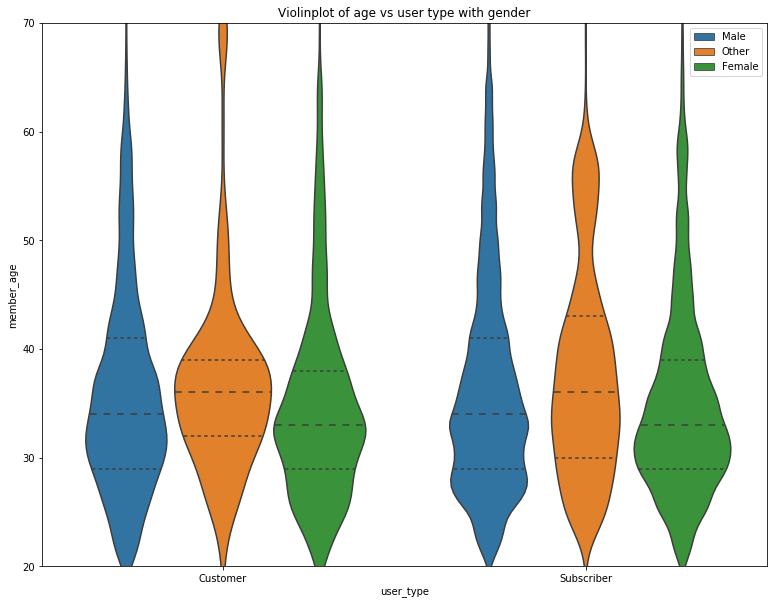

In [44]:
plt.figure(figsize=[13,10])
sns.violinplot(x = 'user_type', y = 'member_age', hue = 'member_gender', data = fordgobike_copy, inner = 'quartile')
plt.ylim([20, 70])
plt.legend(loc = 'best', bbox_to_anchor=[1,1])
plt.title('Violinplot of age vs user type with gender')

Averge age is 35 to 40 who are customers and subscriber, all user type and gender are quite equal range to have user type.

In [45]:
#see columns in dataset
fordgobike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'duration_min',
       'member_age'],
      dtype='object')

What is the relations between start_longitude, start_latitude, end_longitude and end_latitude?

Text(0.5,1,'Scatter plot of longitude and latitude of bike trip')

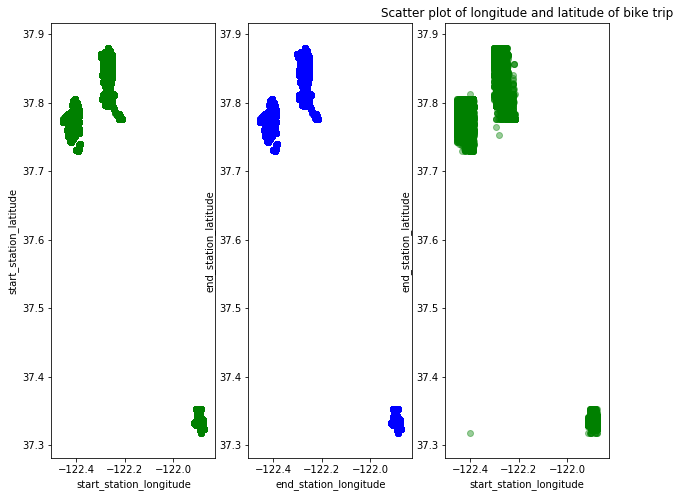

In [46]:
#subplots of latitude and longitude.
plt.figure(figsize=[10,8])
plt.subplot(1,3,1)
plt.scatter(data= fordgobike_copy, x = 'start_station_longitude', y = 'start_station_latitude', alpha=0.4, color = 'g')
plt.xlabel('start_station_longitude')
plt.ylabel('start_station_latitude')

plt.subplot(1,3,2)
plt.scatter(data= fordgobike_copy, x = 'end_station_longitude', y = 'end_station_latitude', alpha=0.4, color = 'b')
plt.xlabel('end_station_longitude')
plt.ylabel('end_station_latitude')

plt.subplot(1,3,3)
plt.scatter(data= fordgobike_copy, x = 'start_station_longitude', y = 'end_station_latitude', alpha=0.4, color = 'g')
plt.xlabel('start_station_longitude')
plt.ylabel('end_station_latitude')
plt.title('Scatter plot of longitude and latitude of bike trip')

Bike users, start their bike trip in the same longitue and latitude and trip is end in the same as longitude and latitude as well.

In [47]:
#Calculate the distance between latitude and longitude
def haversine_np(lon1, lat1, lon2, lat2):
  """
  calculate the greate circle distance between two points
  on the earth (specified in decimal degrees)
  all args must be of equal length
  """
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c    # 6367 is the radius of eart in km
  return km

In [48]:
#creating new column called distance using haversine formula.
fordgobike_copy['distance'] = haversine_np(fordgobike_copy['start_station_longitude'], fordgobike_copy['start_station_latitude'], fordgobike_copy['end_station_longitude'], fordgobike_copy['end_station_latitude'])
fordgobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869.750000,37,0.544367
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,1030.900000,49,2.702847
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,608.166667,32,0.260575
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,26.416667,47,2.407789
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,29.883333,62,3.330111


In [49]:
#description of distance column
fordgobike_copy.duration_min.describe()

count    174687.000000
mean         11.738494
std          27.388167
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

**See distance and duration_min, how are they related with each other?**

In [50]:
fordgobike_copy1 = fordgobike_copy[~(fordgobike_copy.distance>20)]
fordgobike_copy1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869.750000,37,0.544367
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,1030.900000,49,2.702847
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,608.166667,32,0.260575
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,26.416667,47,2.407789
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,29.883333,62,3.330111


Text(0.5,1,'Scatter plot of distance (Km) vs time (Min')

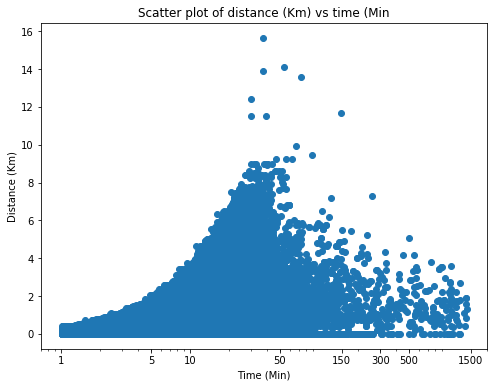

In [51]:

plt.figure(figsize = [8,6])
plt.scatter(y = 'distance', x = 'duration_min', data = fordgobike_copy1)
plt.xscale('log')
ticks = [1, 5, 10, 50, 150, 300, 500, 1500]
plt.xticks(ticks, ticks)
plt.xlabel('Time (Min)')
plt.ylabel('Distance (Km)')
plt.title('Scatter plot of distance (Km) vs time (Min')


In the duration_min and distance plot maximum distance around 10km, and time between 30-40 mins, lowest time is 1 min with 0-1km, that means users didn't do any bike trip at that time, many bikers rented bike for 1500 min kept running for around 5-6 kilometer. highest distance travel is 16km in 50mins.

In [52]:
#check null values in the data
fordgobike_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
member_age                 0
distance                   0
dtype: int64

In [53]:
#removing null values from the id's column and station_name column
fordgobike_copy = fordgobike_copy.dropna(subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174687 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174687 non-null int64
start_time                 174687 non-null datetime64[ns]
end_time                   174687 non-null datetime64[ns]
start_station_id           174687 non-null float64
start_station_name         174687 non-null object
start_station_latitude     174687 non-null float64
start_station_longitude    174687 non-null float64
end_station_id             174687 non-null float64
end_station_name           174687 non-null object
end_station_latitude       174687 non-null float64
end_station_longitude      174687 non-null float64
bike_id                    174687 non-null int64
user_type                  174687 non-null object
member_gender              174687 non-null object
bike_share_for_all_trip    174687 non-null object
duration_min               174687 non-null float64
member_age                 174687 non-null int64
distance           

In [54]:
#converting id's to object columns
cols = ['start_station_id', 'end_station_id', 'bike_id']
for i in cols:
  fordgobike_copy[i] = fordgobike_copy[i].astype(str)

In [55]:
#check if the datatype is changed
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174687 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174687 non-null int64
start_time                 174687 non-null datetime64[ns]
end_time                   174687 non-null datetime64[ns]
start_station_id           174687 non-null object
start_station_name         174687 non-null object
start_station_latitude     174687 non-null float64
start_station_longitude    174687 non-null float64
end_station_id             174687 non-null object
end_station_name           174687 non-null object
end_station_latitude       174687 non-null float64
end_station_longitude      174687 non-null float64
bike_id                    174687 non-null object
user_type                  174687 non-null object
member_gender              174687 non-null object
bike_share_for_all_trip    174687 non-null object
duration_min               174687 non-null float64
member_age                 174687 non-null int64
distance            

In [56]:
#extract time from the start_time column
fordgobike_copy['timeS'] = fordgobike_copy.start_time.dt.time
fordgobike_copy['timeS']

0         17:32:10.145000
2         12:13:13.218000
3         17:54:26.010000
4         23:54:18.549000
5         23:49:58.632000
6         23:55:35.104000
7         23:41:06.766000
8         23:41:48.790000
9         23:49:47.699000
10        23:57:57.211000
11        23:56:55.540000
12        23:45:12.651000
14        23:56:26.848000
15        23:59:18.548000
16        23:50:41.607000
17        23:48:25.095000
18        23:49:01.851000
19        23:43:05.183000
20        23:50:38.239000
21        23:50:26.879000
22        23:44:56.439000
23        23:51:06.014000
24        23:52:51.164000
25        23:50:31.431000
26        23:49:24.399000
27        23:48:08.282000
29        23:43:48.658000
30        23:50:45.698000
31        23:49:27.027000
32        23:45:39.234000
               ...       
183380    00:43:11.550000
183381    00:48:54.159000
183382    00:38:29.904000
183383    00:47:11.653000
183384    00:50:41.579000
183385    00:46:47.276000
183386    00:42:20.472000
183387    00

In [57]:
#extract day from the start_time and end_time 
fordgobike_copy['start_day'] = fordgobike_copy['start_time'].dt.strftime('%A')
fordgobike_copy.start_day

0         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
6         Thursday
7         Thursday
8         Thursday
9         Thursday
10        Thursday
11        Thursday
12        Thursday
14        Thursday
15        Thursday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
29        Thursday
30        Thursday
31        Thursday
32        Thursday
            ...   
183380      Friday
183381      Friday
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183403      

In [58]:
#extract time from the end_time column
fordgobike_copy['timeE'] = fordgobike_copy['end_time'].dt.time
fordgobike_copy['timeE']

0         08:01:55.975000
2         05:24:08.146000
3         04:02:36.842000
4         00:20:44.074000
5         00:19:51.760000
6         00:14:42.588000
7         00:08:02.756000
8         00:07:59.715000
9         00:07:17.025000
10        00:05:35.435000
11        00:05:21.733000
12        00:04:49.184000
14        00:03:01.947000
15        00:02:47.228000
16        23:59:49.953000
17        23:59:40.092000
18        23:58:19.809000
19        23:57:39.796000
20        23:57:35.852000
21        23:57:21.130000
22        23:57:20.212000
23        23:57:13.312000
24        23:57:03.976000
25        23:56:31.891000
26        23:55:50.284000
27        23:54:56.930000
29        23:54:18.254000
30        23:53:29.569000
31        23:53:10.535000
32        23:52:24.850000
               ...       
183380    00:58:55.217000
183381    00:56:00.474000
183382    00:54:31.732000
183383    00:54:26.305000
183384    00:53:46.124000
183385    00:53:27.596000
183386    00:49:25.515000
183387    00

In [59]:
#extracting day from the end_ime column
fordgobike_copy['end_day'] = fordgobike_copy['end_time'].dt.strftime('%A')
fordgobike_copy.end_day

0           Friday
2           Friday
3           Friday
4           Friday
5           Friday
6           Friday
7           Friday
8           Friday
9           Friday
10          Friday
11          Friday
12          Friday
14          Friday
15          Friday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
29        Thursday
30        Thursday
31        Thursday
32        Thursday
            ...   
183380      Friday
183381      Friday
183382      Friday
183383      Friday
183384      Friday
183385      Friday
183386      Friday
183387      Friday
183389      Friday
183390      Friday
183391      Friday
183392      Friday
183393      Friday
183394      Friday
183395      Friday
183396      Friday
183397      Friday
183398      Friday
183399      Friday
183400      Friday
183401      Friday
183403      

In [60]:
#droppin cloumn start_time and end_time
fordgobike_copy.drop(['start_time', 'end_time'], axis = 1, inplace=True)
fordgobike_copy.head(1)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age,distance,timeS,start_day,timeE,end_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869.75,37,0.544367,17:32:10.145000,Thursday,08:01:55.975000,Friday


In [61]:
fordgobike_copy['timeS_hour'] = fordgobike_copy.timeS.apply(lambda x : x.hour)
fordgobike_copy.timeS_hour

0         17
2         12
3         17
4         23
5         23
6         23
7         23
8         23
9         23
10        23
11        23
12        23
14        23
15        23
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
29        23
30        23
31        23
32        23
          ..
183380     0
183381     0
183382     0
183383     0
183384     0
183385     0
183386     0
183387     0
183389     0
183390     0
183391     0
183392     0
183393     0
183394     0
183395     0
183396     0
183397     0
183398     0
183399     0
183400     0
183401     0
183403     0
183404     0
183405     0
183406     0
183407     0
183408     0
183409     0
183410     0
183411     0
Name: timeS_hour, Length: 174687, dtype: int64

In [62]:
fordgobike_copy['timeE_hour'] = fordgobike_copy.timeE.apply(lambda x : x.hour)
fordgobike_copy.timeE_hour

0          8
2          5
3          4
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
14         0
15         0
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
29        23
30        23
31        23
32        23
          ..
183380     0
183381     0
183382     0
183383     0
183384     0
183385     0
183386     0
183387     0
183389     0
183390     0
183391     0
183392     0
183393     0
183394     0
183395     0
183396     0
183397     0
183398     0
183399     0
183400     0
183401     0
183403     0
183404     0
183405     0
183406     0
183407     0
183408     0
183409     0
183410     0
183411     0
Name: timeE_hour, Length: 174687, dtype: int64

Which day bikers use more bike trip during weekend and weekdays?

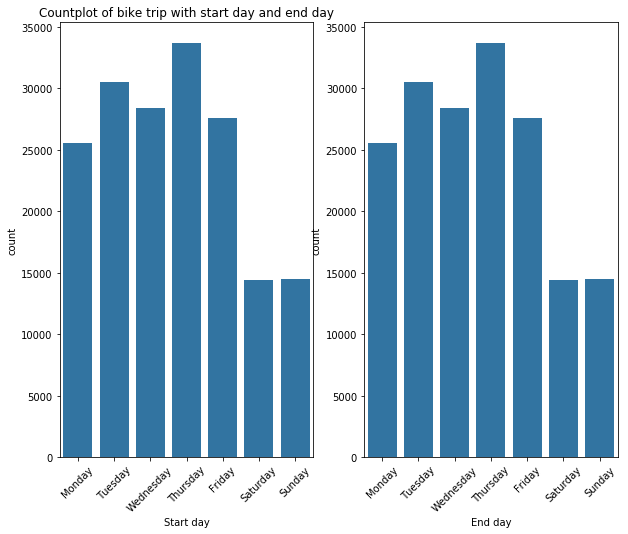

In [63]:
plt.figure(figsize=[10,8])
plt.title('Bike trip with start day and end day')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.subplot(1,2,1)
sns.countplot(x= 'start_day', data=fordgobike_copy, order = order, color = base_color )
plt.xlabel('Start day')
plt.xticks(rotation = 45)
plt.title('Countplot of bike trip with start day and end day')
plt.subplot(1,2,2)
sns.countplot(x= 'start_day', data=fordgobike_copy, order = order, color = base_color )
plt.xlabel('End day')
plt.xticks(rotation = 45)
plt.show()

We can see both countplot, start_day and end_day,  higher bike trip was start on Thursday and end was on higher on Thursday as well. It was surprising that bike trip were more less on weekends than weekdays

<a id="multi"></a>
Multivariate

## Multivariate

Plot with 2-3 or more variables.

Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Start_day and End_day are highly correlated with each other. Bike trip happened pretty much every day, probably bikers enjoy biking in their regular life, who doesn't? Starting hours and ending hours are also correlated with each other.
Higher time of bike trip happened on Thursdays.

Were there any interesting or surprising interactions between features?

There is interesting feautre in user type, age between 35-40 have equally customers and subscriber

What are the hours of rent a bike and returned it back in certain days?

In [64]:
#filter the data get hours not included max hours
fordgobike_copy2 = fordgobike_copy[~(fordgobike_copy.timeS_hour>20)]

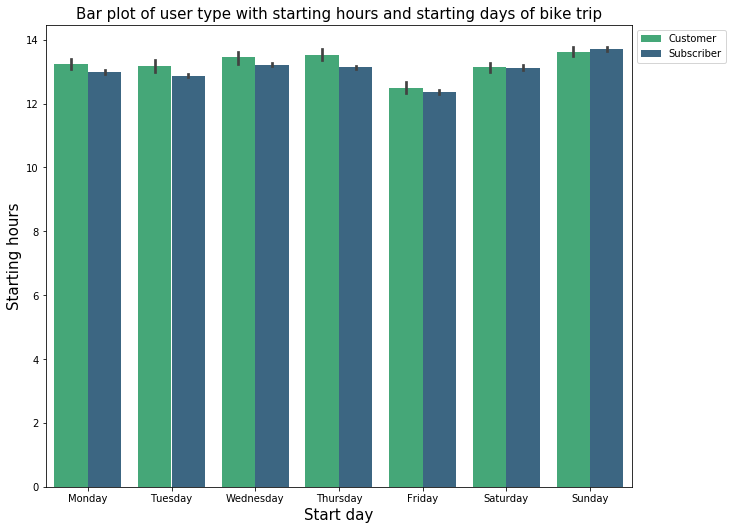

In [65]:
color = sns.color_palette()[2]
plt.figure(figsize=[10.5,8.5])
sns.barplot(data = fordgobike_copy2, x = 'start_day', y = 'timeS_hour', palette='viridis_r', hue = 'user_type', order = order)
plt.legend(loc = 'best', bbox_to_anchor=[1,1])
plt.xlabel('Start day', fontsize = 15)
plt.ylabel('Starting hours', fontsize = 15)
plt.title('Bar plot of user type with starting hours and starting days of bike trip', fontsize = 15)
plt.show()

In the barplot, we can see Monday to Thursday, there were more customers than subscriber, only on sundays, it's slighlty increased of subscriber than customers. Bike trip is little less on Fridays. On Sundays, bike trip id higher than other days. There is only slightly diffrence in hours for riding a bike on weekdays.

In [66]:
#description of starting hour
fordgobike_copy.timeS_hour.describe()

count    174687.000000
mean         13.455460
std           4.735782
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: timeS_hour, dtype: float64

In [67]:
#description of ending hours
fordgobike_copy.timeE_hour.describe()

count    174687.000000
mean         13.608866
std           4.749525
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: timeE_hour, dtype: float64

Which day bikers start and stop bike trip and how long they run their bikes?

In [68]:
#groupby of star_day and end_day and converting into Dataframe
bikes = pd.DataFrame(fordgobike_copy.groupby(['start_day', 'end_day']).count()['duration_sec'])
bikes = bikes.reset_index()

In [69]:
#converting start_day and end_day to categorical.
bikes.start_day = pd.Categorical(bikes.start_day, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
bikes.end_day = pd.Categorical(bikes.end_day, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

In [70]:
bikes.sort_values(by = ['start_day', 'end_day'], inplace=True)
bikes.head()

,start_day,end_day,duration_sec
2,Monday,Monday,25541
3,Monday,Tuesday,37
10,Tuesday,Tuesday,30523
11,Tuesday,Wednesday,30
13,Wednesday,Wednesday,28351


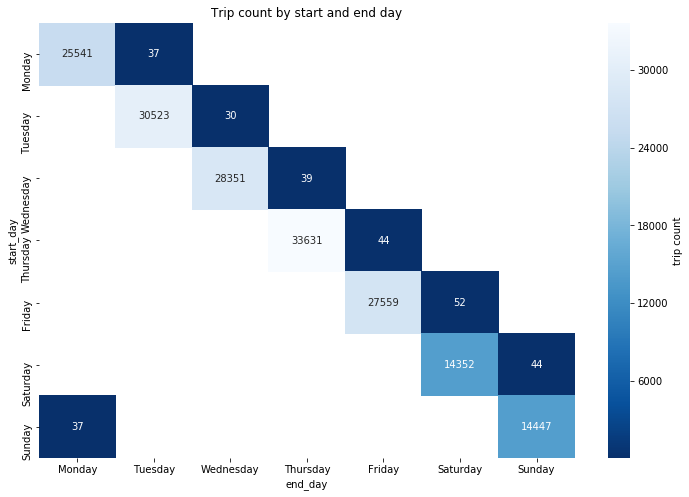

In [71]:
bikes_pivot = bikes.pivot(values='duration_sec', index='start_day', columns = 'end_day')
plt.figure(figsize=[12,8])
sns.heatmap(bikes_pivot, annot=True, fmt='.0f', cbar_kws={'label':'trip count'}, cmap='Blues_r')
plt.title('Trip count by start and end day')
plt.show()

maximum trip counts on Thursday on start day and end day, minimum trip count on Saturday and Sunday. Seems like bikers ride bikes weekdays more than weekend.

In [72]:
# plt.figure(figsize = (12, 8))
# order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# g = sns.FacetGrid(data=fordgobike_copy, col = 'start_day', col_order=order, hue = 'end_day', col_wrap = 4, size = 4, sharex=False)
# g.map(sns.scatterplot, 'timeS_hour', 'timeE_hour', data = fordgobike_copy, palette = 'Set2')
# #plt.xticks([1,5,9,13,17,23])
# #plt.xticks(np.arange(min(fordgobike_copy.timeS_hour), max(fordgobike_copy.timeS_hour)+1, 1))
# #plt.xlimt([5,23])
# #plt.yticks([1,5,9,13,17,23])
# plt.show()

Start days and end_days are highly correlated with each other, we can say that user do bike trip every day in certain time duration.

In [73]:
#filter time for rented bike
filter_time = (fordgobike_copy['duration_min']>=50 ) & (fordgobike_copy['duration_min']<=60)
filter_time = fordgobike_copy.loc[filter_time, :]
filter_time.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,bike_share_for_all_trip,duration_min,member_age,distance,timeS,start_day,timeE,end_day,timeS_hour,timeE_hour
55,3478,11.0,Davis St at Jackson St,37.79728,-122.398436,11.0,Davis St at Jackson St,37.79728,-122.398436,1846,...,No,57.966667,26,0.0,22:39:35.020000,Thursday,23:37:33.342000,Thursday,22,23
56,3140,11.0,Davis St at Jackson St,37.79728,-122.398436,11.0,Davis St at Jackson St,37.79728,-122.398436,3040,...,No,52.333333,38,0.0,22:44:53.503000,Thursday,23:37:14.090000,Thursday,22,23
75,3001,159.0,24th St at Market St,37.81606,-122.278244,159.0,24th St at Market St,37.81606,-122.278244,5471,...,Yes,50.016667,23,0.0,22:37:41.470000,Thursday,23:27:43.363000,Thursday,22,23
204,3413,159.0,24th St at Market St,37.81606,-122.278244,159.0,24th St at Market St,37.81606,-122.278244,5702,...,Yes,56.883333,28,0.0,21:38:01.453000,Thursday,22:34:54.707000,Thursday,21,22
205,3427,159.0,24th St at Market St,37.81606,-122.278244,159.0,24th St at Market St,37.81606,-122.278244,5563,...,Yes,57.116667,23,0.0,21:37:46.214000,Thursday,22:34:53.644000,Thursday,21,22


Which day male and females ride a bike and how long?

Text(0.5,1,'Pointplot of days vs time (Min) with gender')

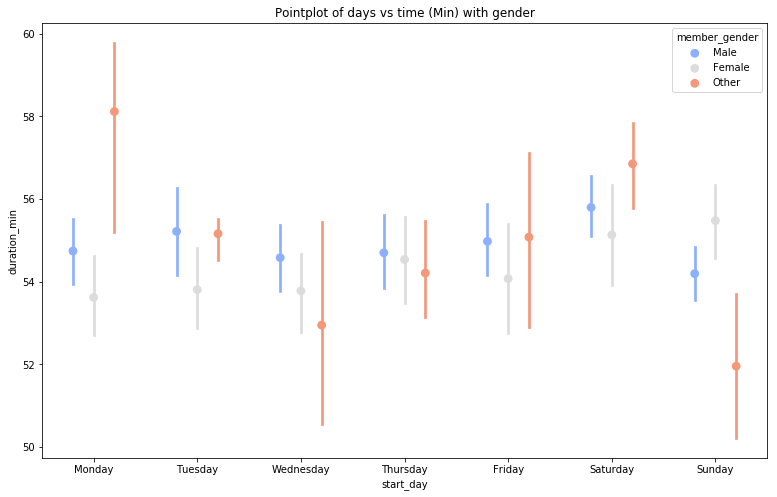

In [74]:
plt.figure(figsize=[13,8])
sns.pointplot(data=filter_time, x = 'start_day', y = 'duration_min', hue = 'member_gender', palette='coolwarm', dodge=0.4, linestyles='', order = order)
plt.title('Pointplot of days vs time (Min) with gender')

Others who didn't registered as a male and female they did bike trip more than male and female. They rode bike on Mondays on maximum time, and very less biking on Tuesday. Male and female's bike ride is quite similar on certain days and certain mins.

Let's find out user types who ride bikes on certain days and how long?

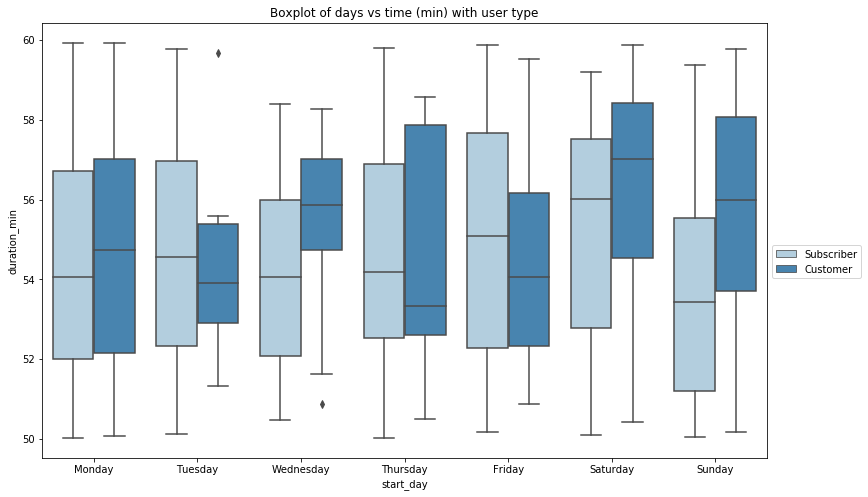

In [75]:
plt.figure(figsize = [13,8])
sns.boxplot(data=filter_time, x = 'start_day', y = 'duration_min', hue = 'user_type', palette='Blues', dodge=0.4, order = order)
plt.title('Boxplot of days vs time (min) with user type')
plt.legend(loc= 'upper left', bbox_to_anchor=[1,0.5])

It's intersting on Thursday maximum customers ride bikes with maximum time and average time on that day is 53 min, while on Friday subscriber rode their bike on maximum time which is equal to customers time on Thursday but average time is greater than customers' average time which is 55 mins only 2 mins more than customers time. Over all customers user type ride their bike more mins than subscriber.

<li><a href="#top">Back to top</a></li>

In [76]:
#!jupyter nbconvert 'fordgobike.ipynb' --to slides --post serve --template output-toggle